## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 4: Modelado no supervisado en Machine Learning
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 4! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el caso y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

## Objetivos
- Diseñarás y aplicarás un modelo de *clustering*.
- Indicarás la cantidad óptima de grupos dado un conjunto que se te proporcionará.
- Generarás visualizaciones para *clustering* y método del codo.
- Usarás por lo menos un índice de desempeño para evaluar el modelo.


## Caso de estudio

Una empresa financiera tiene un nuevo producto dirigido a sus clientes con diferentes límites de crédito, por ello, es necesario dividir a los clientes en grupos más pequeños.

Desafortunadamente, los directivos no tienen idea de cuál es la cantidad óptima en la que se puede segregar a los clientes y cómo dirigir a nuevos clientes a esos grupos.

Es por eso que en este punto se te ha contratado. Para poder ejecutar tu trabajo te han compartido una base de datos que contiene las características que, según sus informes, son los más importantes para la aplicación de este programa. Consiste en seis puntos:
- **Salario mensual:** indica el ingreso mensual del cliente en pesos mexicanos.
- **Crédito tipo 1:** es un producto financiero que el cliente ha obtenido de la institución financiera; `1` significa que tiene este producto y `0` que no cuenta con él.
- **Crédito tipo 2:** es similar a las características del anterior; `1` significa que cuenta con el producto y `0` que no.
- **Límite de TC:** indica el límite de crédito de la tarjeta del cliente.
- **Años siendo cliente:** corresponde al tiempo que el cliente ha tenido una relación comercial con la institución financiera.
- **Previamente se ofreció el producto:** es la versión previa del producto e indica si el cliente se mostró interesado en obtenerlo (`1`) o no (`0`).

El archivo puede ser descargado aquí: https://drive.google.com/file/d/1wcjPCZPTMuDlyWcE1Do4-yqU5AglW_p9/view?usp=sharing

### Observaciones

El cliente requiere que le indiques la cantidad óptima de grupos en los que deberás catalogar a sus clientes. Para ello, usa el método del codo y grafícalo. Recuerda que tus clientes necesitan apoyos visuales.

Una vez que tengas la cantidad de grupos óptimos, deberás aplicar un método de *clustering*. El cliente solicita que le muestres gráficamente cómo están organizados los clientes. Para ello, usa una gráfica de dispersión o la que creas más conveniente.

Incluye, por lo menos, un índice de desempeño (*scoring*) para complementar tus análisis.

Tus visualizaciones deberán tener título y estar presentables. Puedes usar **Pyplot** o **Seaborn**.

Deberás escribir un texto explicando qué representa tu análisis. Usa un lenguaje que vaya dirigido a personas que no saben de ciencia de datos o matemáticas, esto es muy común en la realidad. Deberás hablar de tu gráfica, tus resultados y el manejo de la información, así como del beneficio de usar tu modelo.

Como reto adicional se te proprocionará un archivo en la liga siguiente: https://drive.google.com/file/d/1Nkoc-6AeC3Vzy7gfCNB_DlWTs4dXz7Ug/view?usp=sharing, la cual incluye 50 clientes más. Deberás aplicar el método que usaste para entrenar con tu primer modelo y aplicarlo en estos nuevos clientes. No olvides graficarlos (solo a los nuevos 50 clientes).


## Criterios de evaluación

Modelar el *clustering* correctamente:
- Determinar el número máximo de *clusters* y aplicar PCA (**2 puntos**).
- Hacer el diagrama de codo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Seleccionar y entrenar modelo (**2 puntos**); si no tiene títulos, leyendas y etiquetas, solo tendrás **1 punto**.
- Generar la visualización de datos con un diseño personalizado y agregar títulos y leyendas (**2 puntos**).
- Evaluar el desempeño aplicado y explicar el modelo, la gráfica y el uso de datos a una persona que no es científica de datos (**2 puntos**). Si las explicaciones son dudosas, equivocadas o sin comentarios suficientes, solo tendrás **1 punto**.

**Punto extra**
- Si aplicas el mismo modelo que ya creaste en los nuevos 50 registros, obtendrás **1 punto** extra.
 **Nota:** No debes realizar un nuevo modelo, sino aplicar el ya hecho.
- Si estos nuevos 50 registros se agregan a los registros previos con los que diseñaste la primera gráfica, tendrás **1 punto** extra. Puedes diferenciarlos cambiándoles la forma, color o tamaño; así resaltarán más. Este punto no es válido si la grafica no tiene títulos, etiquetas y leyendas.

¡Éxito! Te vemos en el contenido del siguiente módulo.

# Desarrollo

## Primera Parte EDA

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
df = pd.read_csv(r'C:\Users\ocata\OneDrive\Documentos\JupiterNotebook\ProyectoM4\costumers.csv')
df

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0
...,...,...,...,...,...,...
495,9065.13,0,1,42479.96,0.0,0
496,13175.69,1,0,100968.56,19.3,1
497,15004.61,0,1,7726.65,0.0,0
498,17148.91,1,0,30516.46,0.0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


In [20]:
completitud = pd.DataFrame(df.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total nulos"})
completitud["completitud"] = (1 - completitud["total nulos"] / df.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud

,columna,total nulos,completitud
0,Salario,0,100.0
1,Credito_tipo_1,0,100.0
2,Credito_tipo_2,0,100.0
3,Limite_TC,0,100.0
4,Tiempo_cliente,0,100.0
5,Producto_ofrecido,0,100.0


In [21]:
df.shape

(500, 6)

In [22]:
df.size

3000

In [23]:
df.describe()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,12089.097380,0.610000,0.458000,44784.554960,4.327000,0.602000
std,5123.700116,0.488238,0.498732,22150.923996,4.784776,0.489976
min,-2911.650000,0.000000,0.000000,-22207.950000,0.000000,0.000000
25%,8534.350000,0.000000,0.000000,30096.285000,0.000000,0.000000
50%,11438.600000,1.000000,0.000000,47991.515000,0.000000,1.000000
75%,15171.467500,1.000000,1.000000,59108.175000,8.400000,1.000000
max,30041.400000,1.000000,1.000000,118636.820000,19.300000,1.000000


In [24]:
duplicados = df[df.duplicated()]
duplicados.shape

(0, 6)

In [25]:
duplicados = df[df.duplicated()]
cantidad_duplicados = duplicados.shape[0]
print(f"Hay {cantidad_duplicados} filas duplicadas en el DataFrame.")

Hay 0 filas duplicadas en el DataFrame.


In [26]:
columnas_duplicadas = df.columns[df.columns.duplicated(keep=False)]
mensaje = f"Las columnas duplicadas son: {list(columnas_duplicadas)}" if any(columnas_duplicadas) else "No hay columnas duplicadas en el DataFrame."
print(mensaje)

No hay columnas duplicadas en el DataFrame.


In [27]:
print('Las categorias de las columnas se distribuyen de la siguinte forma:')
print(f'\n{df.dtypes.value_counts()}')

Las categorias de las columnas se distribuyen de la siguinte forma:

float64    3
int64      3
Name: count, dtype: int64


In [28]:
col_numericas = df.select_dtypes(include=['float64','int']).columns
col_categoricas = df.select_dtypes(include=['object']).columns

print(f'Hay un total de {len(col_numericas)} columnas numericas:\n {col_numericas}\n\n')
print(f'Hay un total de {len(col_categoricas)} columnas categoricas:\n {col_categoricas}')

Hay un total de 6 columnas numericas:
 Index(['Salario', 'Credito_tipo_1', 'Credito_tipo_2', 'Limite_TC',
       'Tiempo_cliente', 'Producto_ofrecido'],
      dtype='object')


Hay un total de 0 columnas categoricas:
 Index([], dtype='object')


In [29]:
grupos_tipos = df.columns.to_series().groupby(df.dtypes).groups

print("Los nombres de las columnas agrupadas por tipo de dato son:")
for tipo, columnas in grupos_tipos.items():
    print(f"\nTipo de Dato: {tipo}")
    print(list(columnas))

Los nombres de las columnas agrupadas por tipo de dato son:

Tipo de Dato: int64
['Credito_tipo_1', 'Credito_tipo_2', 'Producto_ofrecido']

Tipo de Dato: float64
['Salario', 'Limite_TC', 'Tiempo_cliente']


In [30]:
corr = df[col_numericas].corr()
corr.style.background_gradient(cmap='coolwarm')

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
Salario,1.000000,0.227220,-0.529221,-0.341786,-0.046269,0.031765
Credito_tipo_1,0.227220,1.000000,-0.713460,0.392836,0.126244,-0.013487
Credito_tipo_2,-0.529221,-0.713460,1.000000,-0.155504,-0.125954,0.124177
Limite_TC,-0.341786,0.392836,-0.155504,1.000000,0.705074,0.269304
Tiempo_cliente,-0.046269,0.126244,-0.125954,0.705074,1.000000,0.073490
Producto_ofrecido,0.031765,-0.013487,0.124177,0.269304,0.073490,1.000000


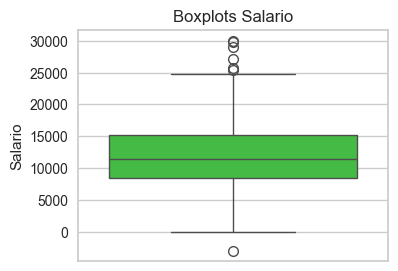

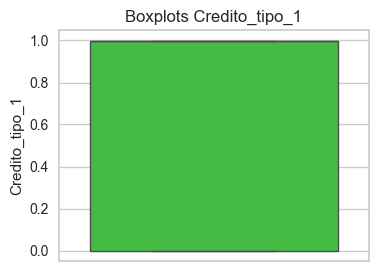

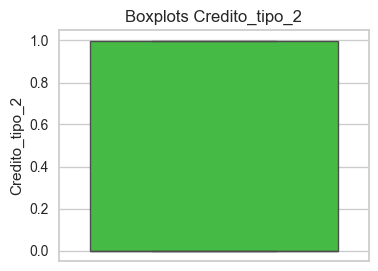

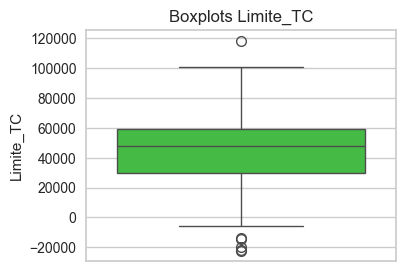

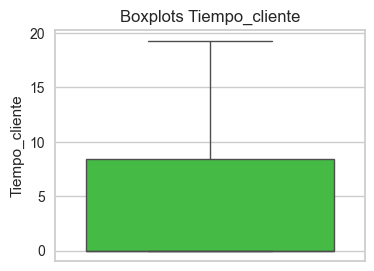

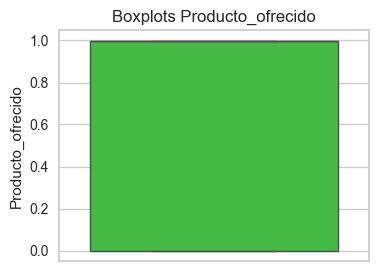

In [31]:
for i in col_numericas:
    plt.figure(figsize=(4, 3))
    sns.boxplot(data=df[i], color='limegreen')
    #plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor claridad
    plt.title(f"Boxplots {i}")
    plt.show()

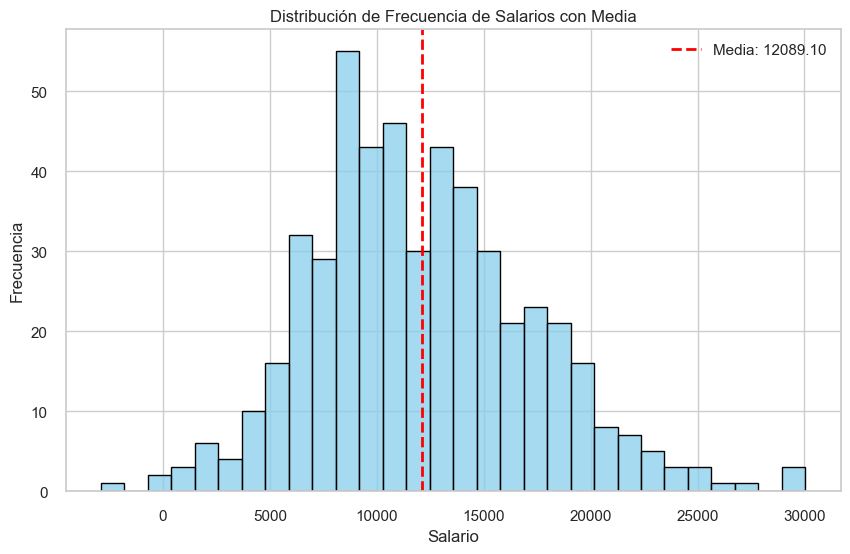

In [32]:
# Crear el gráfico de frecuencia con Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Utilizar el método histplot de Seaborn para el gráfico de frecuencia con intervalos
# Ajusta el número de bins según tu preferencia o conocimientos estadísticos
sns.histplot(data=df, x="Salario", bins=30, kde=False, color="skyblue", edgecolor="black")

# Agregar una línea vertical para la media
mean_salary = df["Salario"].mean()
plt.axvline(x=mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_salary:.2f}')

# Ajustar la presentación del gráfico
plt.title("Distribución de Frecuencia de Salarios con Media")
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.legend()

# Mostrar el gráfico
plt.show()

In [33]:
# Verificamos que valor outlier en columna Salario
print(df[df['Salario']<=0].sort_values('Salario'))

     Salario  Credito_tipo_1  Credito_tipo_2  Limite_TC  Tiempo_cliente  \
472 -2911.65               1               1    86358.8             0.0   

     Producto_ofrecido  
472                  1  


In [34]:
df.drop(472, axis=0, inplace=True)

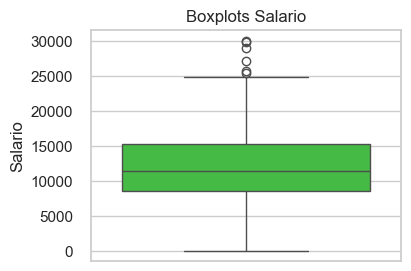

In [35]:
plt.figure(figsize=(4, 3))
sns.boxplot(data=df['Salario'], color='limegreen')
#plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor claridad
plt.title(f"Boxplots Salario")
plt.show()

In [36]:
print(df[df['Salario']>=25000].sort_values('Salario'))

      Salario  Credito_tipo_1  Credito_tipo_2  Limite_TC  Tiempo_cliente  \
37   25410.61               1               0   19522.62             0.0   
334  25674.50               1               0   50270.77             8.5   
325  27175.58               1               0    4856.15             0.0   
319  28951.02               1               0    2066.41             0.0   
478  29868.76               0               0  -22207.95             0.0   
91   30041.40               1               0   -1337.42             0.0   

     Producto_ofrecido  
37                   1  
334                  1  
325                  0  
319                  1  
478                  1  
91                   0  


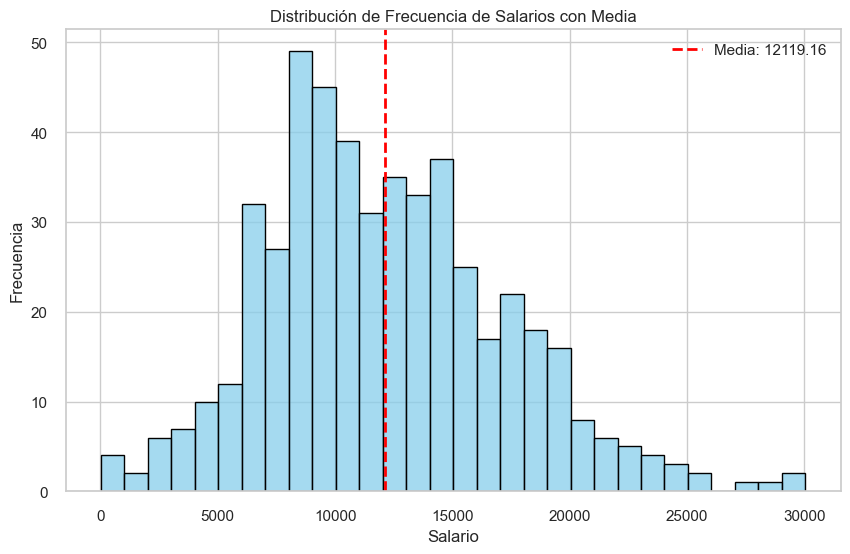

In [37]:
# Crear el gráfico de frecuencia con Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Utilizar el método histplot de Seaborn para el gráfico de frecuencia con intervalos
# Ajusta el número de bins según tu preferencia o conocimientos estadísticos
sns.histplot(data=df, x="Salario", bins=30, kde=False, color="skyblue", edgecolor="black")

# Agregar una línea vertical para la media
mean_salary = df["Salario"].mean()
plt.axvline(x=mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_salary:.2f}')

# Ajustar la presentación del gráfico
plt.title("Distribución de Frecuencia de Salarios con Media")
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.legend()

# Mostrar el gráfico
plt.show()

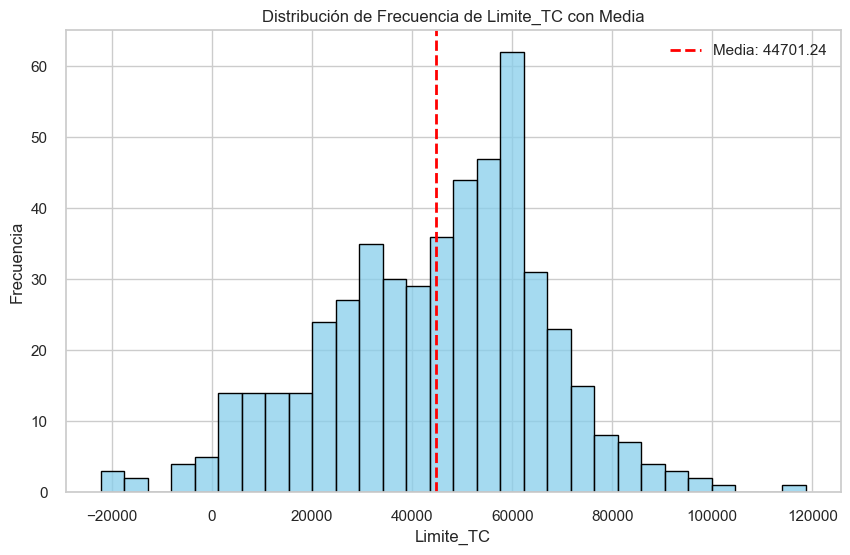

In [38]:
 # Crear el gráfico de frecuencia con Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Utilizar el método histplot de Seaborn para el gráfico de frecuencia con intervalos
# Ajusta el número de bins según tu preferencia o conocimientos estadísticos
sns.histplot(data=df, x="Limite_TC", bins=30, kde=False, color="skyblue", edgecolor="black")

# Agregar una línea vertical para la media
mean_salary = df["Limite_TC"].mean()
plt.axvline(x=mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_salary:.2f}')

# Ajustar la presentación del gráfico
plt.title("Distribución de Frecuencia de Limite_TC con Media")
plt.xlabel("Limite_TC")
plt.ylabel("Frecuencia")
plt.legend()

# Mostrar el gráfico
plt.show()

In [39]:
# Verificamos que valor outlier en columna Limite_TC
print(df[df['Limite_TC']<=0].sort_values('Limite_TC'))

      Salario  Credito_tipo_1  Credito_tipo_2  Limite_TC  Tiempo_cliente  \
478  29868.76               0               0  -22207.95             0.0   
133  17400.43               0               1  -22182.75             0.0   
210  15035.73               0               1  -19952.85             0.0   
184   7823.26               0               1  -14786.24             0.0   
341  20895.92               0               1  -13930.96             0.0   
79   24592.73               1               0   -5897.92             0.0   
212   8896.39               1               0   -5148.28             0.0   
235   9445.21               0               1   -4748.86             0.0   
413  21511.46               0               0   -4199.00             0.0   
47   24295.71               1               0   -2716.47             0.0   
373   7940.18               0               1   -2111.20             0.0   
91   30041.40               1               0   -1337.42             0.0   
228  16321.8

In [40]:
Limite_TC_negativos = df[df['Limite_TC']<0].sort_values('Limite_TC')
porcentaje = round(Limite_TC_negativos.shape[0]/df.shape[0]*100,2)
print(f'El {porcentaje}% de la información, correspondes a datos negativos de la columna Limite_TC, correspondiendo a {Limite_TC_negativos.shape[0]} filas.')

El 2.61% de la información, correspondes a datos negativos de la columna Limite_TC, correspondiendo a 13 filas.


### Nota Aclaratoria
Consultado al banco respecto los valores negativos en el Limite de Credito de la tarjeta de los clientes, señalaron que no puede haber un loimite negativo, correspondientos estos valores a errores de registro, sin embargo tampoco pueden asegurar que sea solo un error de simbolo (-), desconociendo mayores detalles de los errores de registro. Dicho lo anterior, se determina eliminar los valores negativos.

In [41]:
df_clean = df[df['Limite_TC'] >= 0]



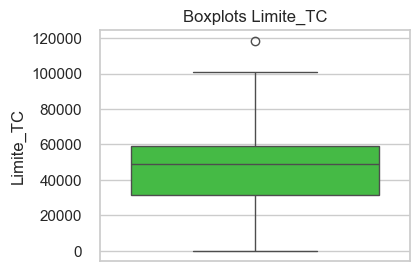

In [42]:
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_clean['Limite_TC'], color='limegreen')
#plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor claridad
plt.title(f"Boxplots Limite_TC")
plt.show()

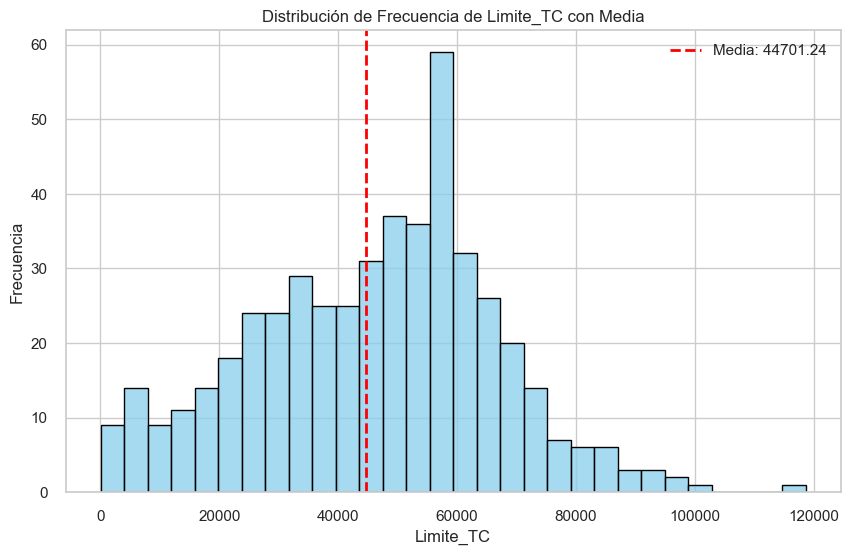

In [43]:
# Crear el gráfico de frecuencia con Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Utilizar el método histplot de Seaborn para el gráfico de frecuencia con intervalos
# Ajusta el número de bins según tu preferencia o conocimientos estadísticos
sns.histplot(data=df_clean, x="Limite_TC", bins=30, kde=False, color="skyblue", edgecolor="black")

# Agregar una línea vertical para la media
mean_salary = df["Limite_TC"].mean()
plt.axvline(x=mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_salary:.2f}')

# Ajustar la presentación del gráfico
plt.title("Distribución de Frecuencia de Limite_TC con Media")
plt.xlabel("Limite_TC")
plt.ylabel("Frecuencia")
plt.legend()

# Mostrar el gráfico
plt.show()

In [44]:
df_clean.describe()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,11961.710617,0.617284,0.456790,46142.800761,4.451646,0.611111
std,4900.978715,0.486551,0.498643,20485.313760,4.795718,0.488000
min,18.110000,0.000000,0.000000,83.870000,0.000000,0.000000
25%,8520.890000,0.000000,0.000000,31168.947500,0.000000,0.000000
50%,11413.825000,1.000000,0.000000,48826.915000,5.100000,1.000000
75%,14984.055000,1.000000,1.000000,59255.002500,8.500000,1.000000
max,28951.020000,1.000000,1.000000,118636.820000,19.300000,1.000000


In [45]:
# Verificamos que valor outlier en columna Limite_TC
print(df[df['Limite_TC']>=100000].sort_values('Limite_TC'))

      Salario  Credito_tipo_1  Credito_tipo_2  Limite_TC  Tiempo_cliente  \
496  13175.69               1               0  100968.56            19.3   
188   5052.04               1               1  118636.82            17.8   

     Producto_ofrecido  
496                  1  
188                  1  


### Nota Aclaratoria
Se determina mantener los valores sobre los 10.0000 ya que corresponden a valore no alegados a la realidad de los datos.


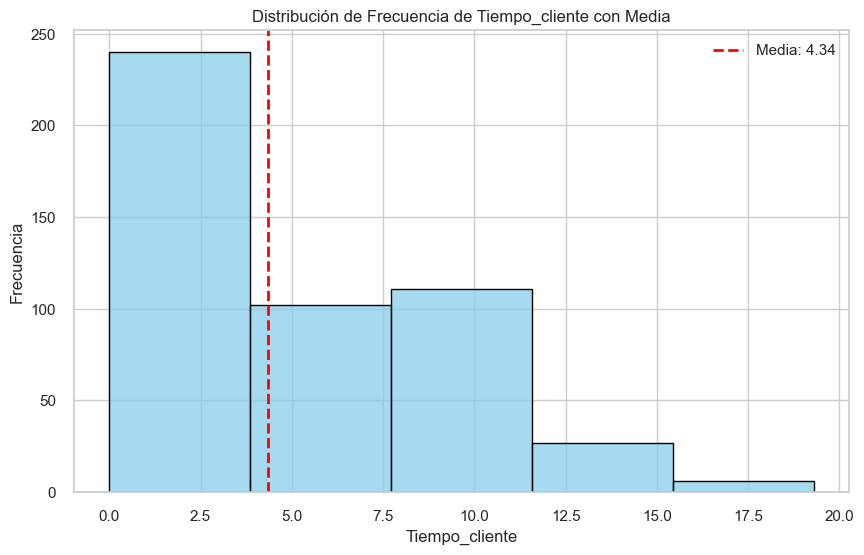

In [46]:
# Crear el gráfico de frecuencia con Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Utilizar el método histplot de Seaborn para el gráfico de frecuencia con intervalos
# Ajusta el número de bins según tu preferencia o conocimientos estadísticos
sns.histplot(data=df_clean, x="Tiempo_cliente", bins=5, kde=False, color="skyblue", edgecolor="black")

# Agregar una línea vertical para la media
mean_salary = df["Tiempo_cliente"].mean()
plt.axvline(x=mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean_salary:.2f}')

# Ajustar la presentación del gráfico
plt.title("Distribución de Frecuencia de Tiempo_cliente con Media")
plt.xlabel("Tiempo_cliente")
plt.ylabel("Frecuencia")
plt.legend()

# Mostrar el gráfico
plt.show()

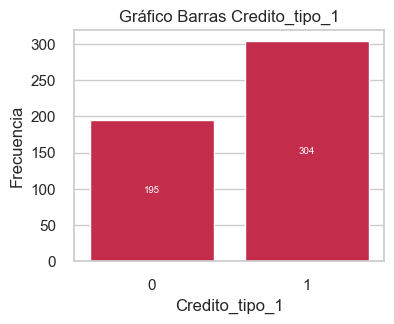

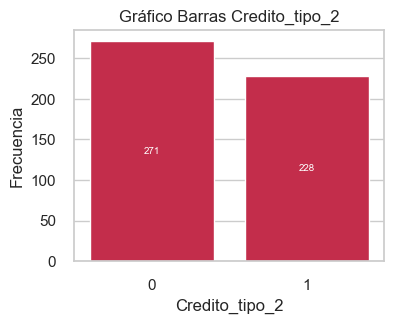

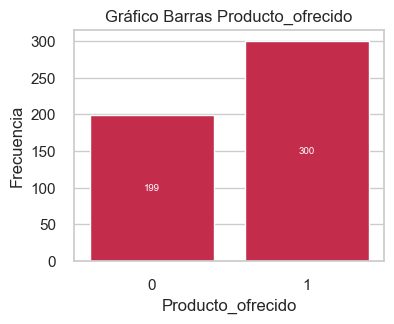

In [47]:
col_booleanas = ['Credito_tipo_1','Credito_tipo_2','Producto_ofrecido']
for i in col_booleanas:
    plt.figure(figsize=(4, 3))
    ax = sns.countplot(x=i, data=df, color='crimson')
    plt.title(f"Gráfico Barras {i}")
    ax.set_ylabel("Frecuencia")  # Cambia "eje y" por la etiqueta que desees
    for p in ax.patches:
       ax.text(p.get_x() + p.get_width() / 2, p.get_height() / 2, int(p.get_height()), fontsize=7, color='white', ha="center", va="center")
    plt.show()

## Segunda Parte

In [75]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering


from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


from sklearn import metrics
from sklearn.metrics import pairwise_distances

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [49]:
scaler = StandardScaler()

df_clean = df_clean.copy()

# Seleccionar solo las columnas numéricas para la estandarización
columnas_numericas = df_clean.select_dtypes(include=['number']).columns

# Aplicar la estandarización utilizando .loc
df_clean.loc[:, columnas_numericas] = scaler.fit_transform(df_clean.loc[:, columnas_numericas])

C:\Users\ocata\AppData\Local\Temp\ipykernel_10216\4197406049.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.78740079  0.78740079 -1.27000127  0.78740079 -1.27000127  0.78740079
  0.78740079 -1.27000127  0.78740079  0.78740079 -1.27000127 -1.27000127
  0.78740079 -1.27000127  0.78740079 -1.27000127 -1.27000127  0.78740079
 -1.27000127 -1.27000127 -1.27000127 -1.27000127  0.78740079  0.78740079
  0.78740079  0.78740079  0.78740079 -1.27000127 -1.27000127 -1.27000127
  0.78740079  0.78740079 -1.27000127 -1.27000127  0.78740079  0.78740079
 -1.27000127  0.78740079  0.78740079 -1.27000127  0.78740079  0.78740079
 -1.27000127  0.78740079  0.78740079  0.78740079  0.78740079  0.78740079
 -1.27000127  0.78740079 -1.27000127  0.78740079 -1.27000127  0.78740079
  0.78740079  0.78740079  0.78740079  0.78740079 -1.27000127  0.78740079
 -1.27000127  0.78740079  0.78740079  0.78740079  0.78740079 -1.27000127
 -1.27000127

In [50]:
df_clean

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,2.167349,0.787401,-0.917011,-0.782148,-0.929211,0.797724
1,-0.276162,0.787401,1.090500,0.365572,-0.929211,0.797724
2,-0.384448,-1.270001,1.090500,-1.368601,-0.929211,-1.253566
3,0.390046,0.787401,-0.917011,-0.748186,-0.929211,0.797724
4,-1.107092,-1.270001,1.090500,-1.246887,-0.929211,-1.253566
...,...,...,...,...,...,...
495,-0.591630,-1.270001,1.090500,-0.178987,-0.929211,-1.253566
496,0.247957,0.787401,-0.917011,2.679102,3.099359,0.797724
497,0.621516,-1.270001,1.090500,-1.877234,-0.929211,-1.253566
498,1.059491,0.787401,-0.917011,-0.763593,-0.929211,0.797724


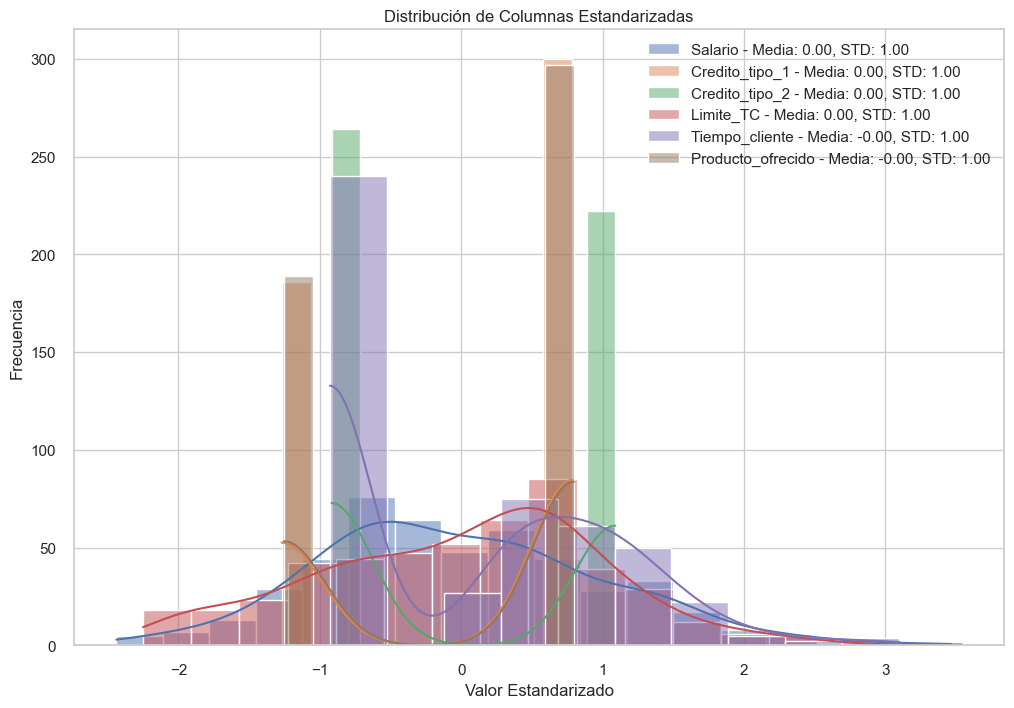

In [51]:
plt.figure(figsize=(12, 8))
for columna in columnas_numericas:
    sns.histplot(df_clean[columna], kde=True, label=f'{columna} - Media: {df_clean[columna].mean():.2f}, STD: {df_clean[columna].std():.2f}')

plt.title("Distribución de Columnas Estandarizadas")
plt.xlabel("Valor Estandarizado")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [52]:
X= df_clean[columnas_numericas]
X

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,2.167349,0.787401,-0.917011,-0.782148,-0.929211,0.797724
1,-0.276162,0.787401,1.090500,0.365572,-0.929211,0.797724
2,-0.384448,-1.270001,1.090500,-1.368601,-0.929211,-1.253566
3,0.390046,0.787401,-0.917011,-0.748186,-0.929211,0.797724
4,-1.107092,-1.270001,1.090500,-1.246887,-0.929211,-1.253566
...,...,...,...,...,...,...
495,-0.591630,-1.270001,1.090500,-0.178987,-0.929211,-1.253566
496,0.247957,0.787401,-0.917011,2.679102,3.099359,0.797724
497,0.621516,-1.270001,1.090500,-1.877234,-0.929211,-1.253566
498,1.059491,0.787401,-0.917011,-0.763593,-0.929211,0.797724


In [53]:
pca = PCA(n_components=2)
pca.fit(X) #Entrenamos PCA
X_pca_nc2 = pca.transform(X) #Aplicamos la transformación
X_pca_nc2

array([[ 8.62667240e-01, -2.27109625e+00],
       [-3.69282053e-01,  3.43921879e-01],
       [-2.40298669e+00, -6.71792017e-01],
       [ 4.23084743e-01, -1.33222496e+00],
       [-2.53545405e+00, -2.30541261e-01],
       [ 2.06339063e+00,  4.69477180e-01],
       [ 2.37365049e+00,  1.12511573e+00],
       [-1.14428612e+00,  1.41902725e+00],
       [ 1.65897054e+00,  1.15272000e-01],
       [ 1.26885253e+00, -7.15649307e-02],
       [-2.53415779e+00, -1.51788180e+00],
       [-8.49696322e-01,  2.79266471e+00],
       [ 3.47312922e-01, -1.90779067e+00],
       [-2.48227041e+00,  3.18967704e-01],
       [ 1.94409430e+00, -2.67017375e-01],
       [ 5.94231987e-01, -5.97217722e-02],
       [-8.05901051e-01,  1.60075074e+00],
       [ 5.64042026e-01, -2.89666793e+00],
       [-2.87710890e+00, -5.87117303e-01],
       [-1.76940508e+00,  6.08288899e-01],
       [-1.14324219e+00,  1.33588502e+00],
       [-2.41929719e+00, -8.36573588e-01],
       [ 1.66849259e+00,  1.03894629e-02],
       [ 1.

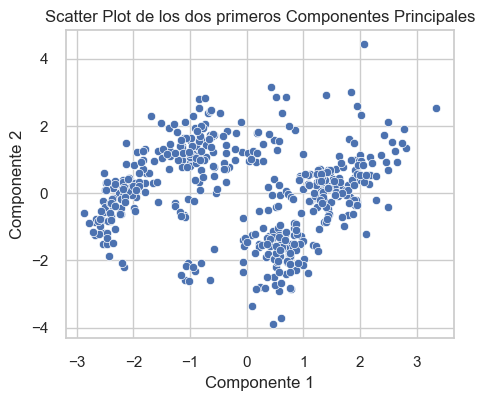

In [54]:
# Crear un DataFrame con los componentes principales
df_nc2 = pd.DataFrame(data=X_pca_nc2, columns=['Componente 1', 'Componente 2'])

# Graficar scatter plot para los dos primeros componentes principales
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Componente 1', y='Componente 2', data=df_nc2)
plt.title('Scatter Plot de los dos primeros Componentes Principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()


In [55]:
## PCA
pca = PCA()
pca.fit(X)

variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([0.36606022, 0.29384935, 0.17102998, 0.12024341, 0.0323232 ,
       0.01649383])

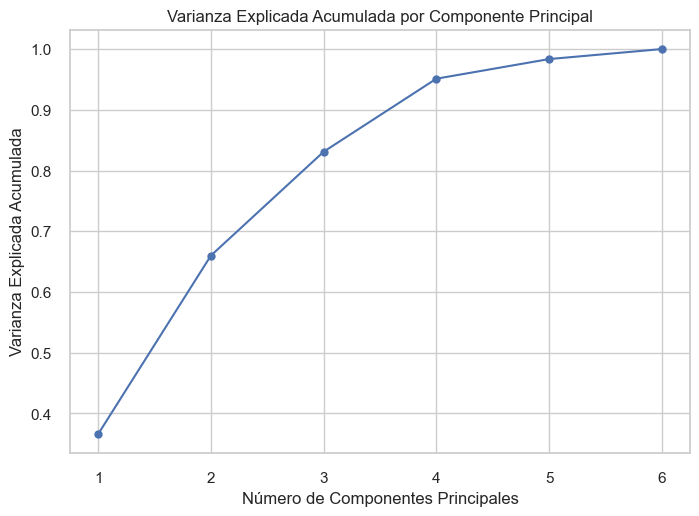

In [56]:
# Crear la gráfica de varianza explicada acumulada
acumulative_variance = np.cumsum(variance_ratio)
plt.plot(range(1, len(variance_ratio) + 1), acumulative_variance, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.show()


In [57]:
# PCA 4 componentes
pca = PCA(n_components=4)
pca.fit(X) #Entrenamos PCA
X_pca_nc4 = pca.transform(X) #Aplicamos la transformación
X_pca_nc4

array([[ 0.86266724, -2.27109625,  1.48789582,  0.06799054],
       [-0.36928205,  0.34392188,  0.7010463 , -1.29878627],
       [-2.40298669, -0.67179202, -0.95193984,  0.33829121],
       ...,
       [-2.36401855, -1.47310611, -0.56306224,  0.94041487],
       [ 0.58753841, -1.68730543,  1.07832382, -0.53318237],
       [ 2.73169752,  1.4852663 ,  0.531126  ,  0.89123073]])

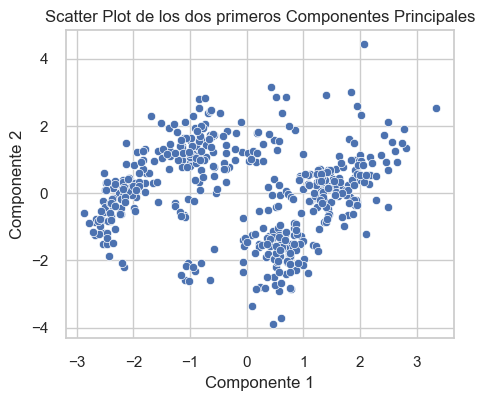

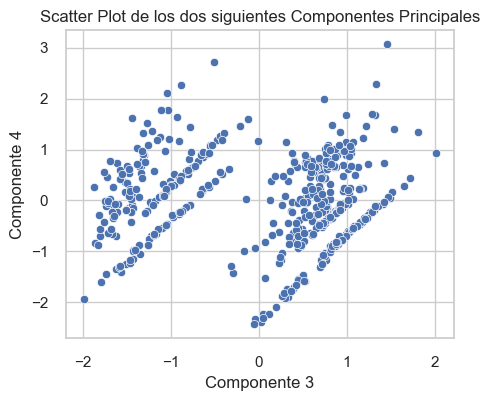

In [58]:
# Crear un DataFrame con los componentes principales
df_nc4 = pd.DataFrame(data=X_pca_nc4, columns=['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4'])

# Graficar scatter plot para los dos primeros componentes principales
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Componente 1', y='Componente 2', data=df_nc4)
plt.title('Scatter Plot de los dos primeros Componentes Principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

# Graficar scatter plot para los dos siguientes componentes principales
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Componente 3', y='Componente 4', data=df_nc4)
plt.title('Scatter Plot de los dos siguientes Componentes Principales')
plt.xlabel('Componente 3')
plt.ylabel('Componente 4')
plt.show()

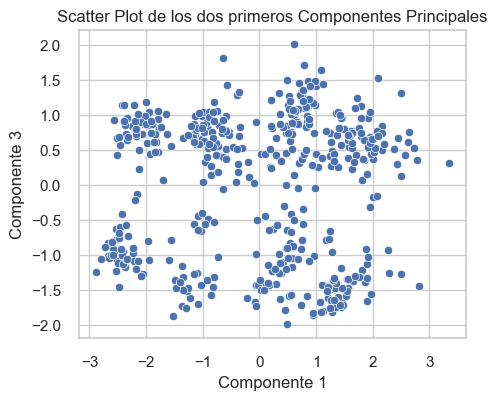

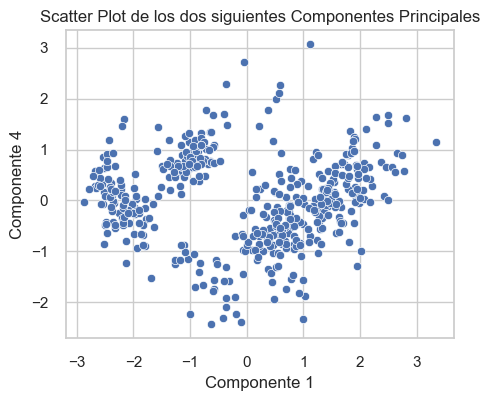

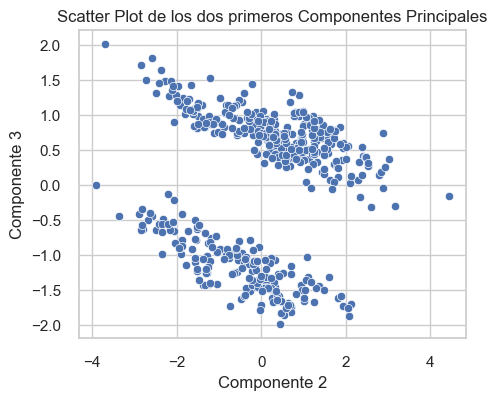

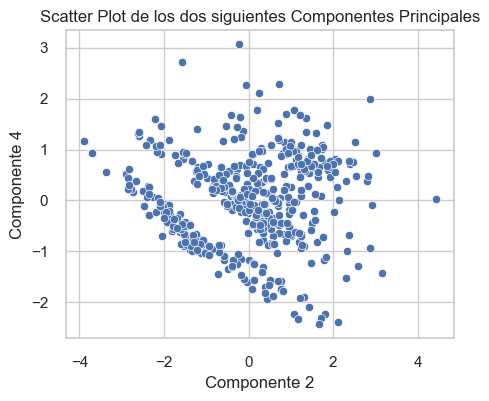

In [59]:
# Graficar scatter plot para los dos primeros componentes principales
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Componente 1', y='Componente 3', data=df_nc4)
plt.title('Scatter Plot de los dos primeros Componentes Principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 3')
plt.show()

# Graficar scatter plot para los dos siguientes componentes principales
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Componente 1', y='Componente 4', data=df_nc4)
plt.title('Scatter Plot de los dos siguientes Componentes Principales')
plt.xlabel('Componente 1')
plt.ylabel('Componente 4')
plt.show()

# Graficar scatter plot para los dos primeros componentes principales
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Componente 2', y='Componente 3', data=df_nc4)
plt.title('Scatter Plot de los dos primeros Componentes Principales')
plt.xlabel('Componente 2')
plt.ylabel('Componente 3')
plt.show()

# Graficar scatter plot para los dos siguientes componentes principales
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Componente 2', y='Componente 4', data=df_nc4)
plt.title('Scatter Plot de los dos siguientes Componentes Principales')
plt.xlabel('Componente 2')
plt.ylabel('Componente 4')
plt.show()



#### Metódo del Codo

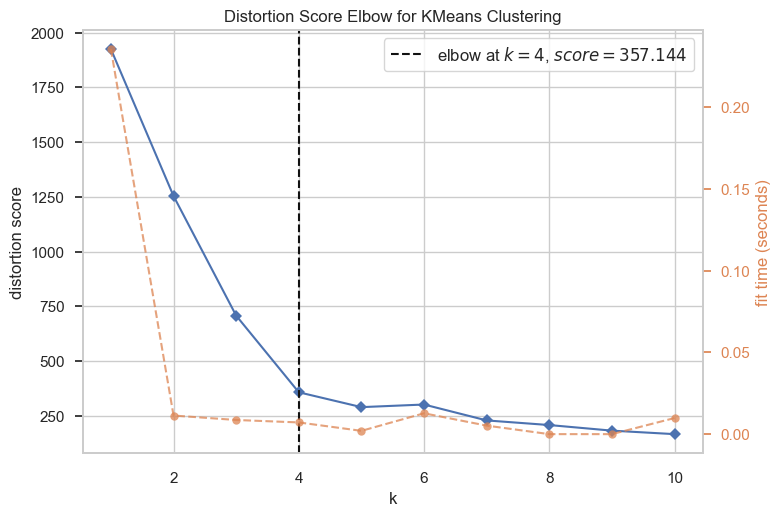

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X_pca_nc2) # Hacemos fit a los datos en el visualizador
visualizer.show() # Renderizamos la figura y la mostramos

In [61]:
# Entrenamiento
kmeans_pca = KMeans(n_clusters = 4,  n_init = 'auto').fit(X_pca_nc2)
labels = kmeans_pca.labels_ # Obtención de las etiquetas de los clusters para cada muestra

centroides = kmeans_pca.cluster_centers_
#centroides = df_cluster.groupby('Cluster').mean() ##Otra alternativa de obtener los centroides
print(centroides)

[[-0.71193518  1.40568688]
 [ 0.43864866 -1.78747119]
 [ 1.60384149  0.38904353]
 [-2.16188449 -0.30332226]]


In [62]:
centroides.shape

(4, 2)

In [63]:
df_cluster = pd.DataFrame({'Componente Principal 1': X_pca_nc2[:, 0],
                   'Componente Principal 2': X_pca_nc2[:, 1],
                   'Cluster': labels})

df_cluster

,Componente Principal 1,Componente Principal 2,Cluster
0,0.862667,-2.271096,1
1,-0.369282,0.343922,0
2,-2.402987,-0.671792,3
3,0.423085,-1.332225,1
4,-2.535454,-0.230541,3
...,...,...,...
481,-1.945872,0.091537,3
482,3.338901,2.526757,2
483,-2.364019,-1.473106,3
484,0.587538,-1.687305,1


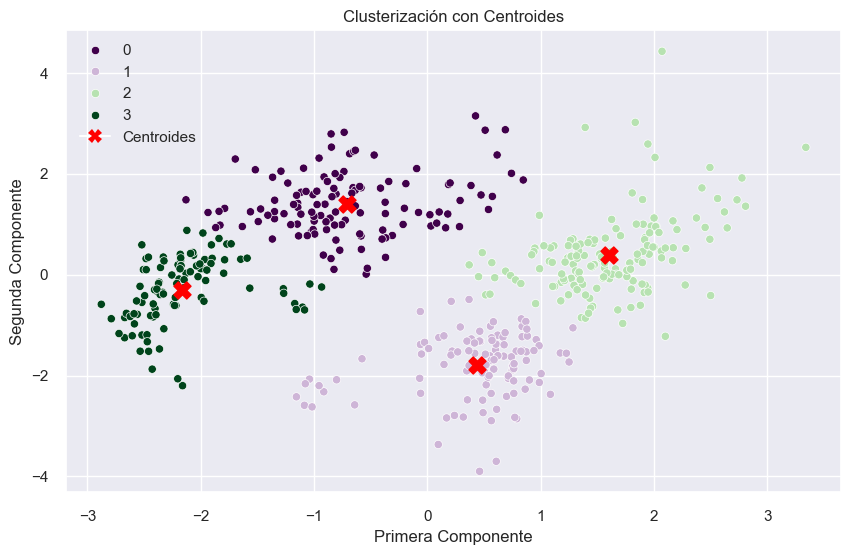

In [64]:

# Graficamos
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='Componente Principal 1', y='Componente Principal 2', hue='Cluster', palette='PRGn')

# Centroide
plt.scatter(centroides[:,0], centroides[:,1], marker='X', s=150, color='red')

#Etiquetas
plt.xlabel('Primera Componente')
plt.ylabel('Segunda Componente')
plt.title('Clusterización con Centroides')

centroide_leyenda = plt.Line2D([], [], marker='X', color='w', label='Centroides', markerfacecolor='red', markersize=10)
cluster_leyenda = plt.gca().get_legend_handles_labels()
plt.legend(handles=[*cluster_leyenda[0], centroide_leyenda], labels=[*cluster_leyenda[1], 'Centroides'])

plt.show()


In [67]:
davies_bouldin = davies_bouldin_score(X_pca_nc2, labels)
davies_bouldin

0.6137279531507884

In [80]:
silhouette = silhouette_score(X_pca_nc2, labels)
silhouette


0.536987567466357

In [68]:

calinski_harabasz = calinski_harabasz_score(X_pca_nc2, labels)
print("Índice Calinski-Harabasz:", calinski_harabasz)

Índice Calinski-Harabasz: 705.627014817977


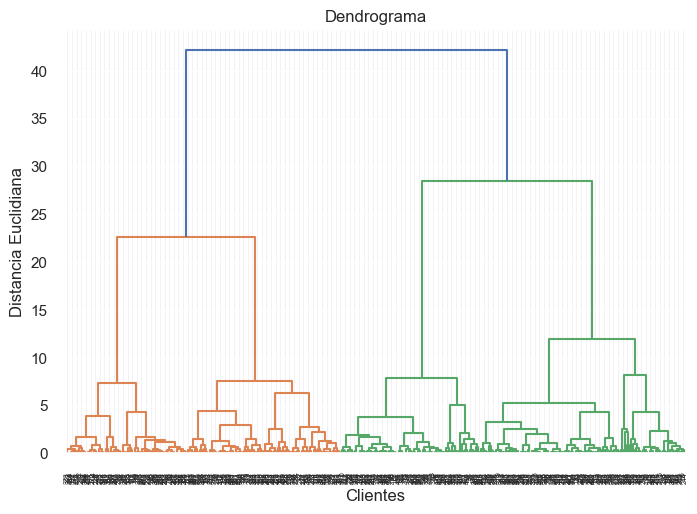

In [73]:
dendrograma = hc.dendrogram(hc.linkage(X_pca_nc2, method = 'ward'))

plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [76]:
Silueta = metrics.silhouette_score(X_pca_nc2, labels)
Calinski_Harabasz = metrics.calinski_harabasz_score(X_pca_nc2, labels)
Davies_Bouldin = metrics.davies_bouldin_score(X_pca_nc2, labels)

print("Score Análisis de silueta: ", Silueta)
print("Score índice Calinski-Harabasz : ", Calinski_Harabasz)
print("Score índice Davies-Bouldin: ", Davies_Bouldin)

Score Análisis de silueta:  0.536987567466357
Score índice Calinski-Harabasz :  705.627014817977
Score índice Davies-Bouldin:  0.6137279531507884
